In [1]:
# ESAI
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

<h1 align='center'>Tarea 1: Cúmulos abiertos</h1>

Los puntos 4.1 al 4.5 del Karttunen se encuentran en el PDF adjunto a esta tarea

### Magnitud aparente de un avión

Para este punto, queremos saber cómo cambia la magnitud aparente de un avión a medida que va aterrizando. Lo primero que debemos conocer es la potencia de los bombillos de aterrizaje de un avión (Los bombillos de despegue tienen especificaciones diferentes). La mayoría de aviones Boeing y Airbus utilizan bombillos incadescentes Oshino Q4559X (De acuerdo con <a href="https://aerosavvy.com/airplane-lights/">AeroSavvy</a>). Buscando estos bombillos en la página de <a href="https://shop.boeing.com/aviation-supply/p/Q4559X=1F">Boeing</a>, estos bombillos tienen una potencia de 600 W.

Para motivos de este ejercicio, tomaremos un bombillo individual de los de un avión y calcularemos su magnitud aparente a distintas distancias, con el fin de visualizar cómo varía la magnitud a medida que el avión va aterrizando. Tomamos solo uno para seguir el procedimiento de Chandra D. en su artículo: <a href="https://iopscience.iop.org/article/10.1088/1361-6552/aacae5#:~:text=Apparent%20magnitudes%20of%20incandescent%20lamps,-Incandescent%20lamps%20are&text=The%20apparent%20magnitude%20of%20an,as%20per%20proposition%20of%20Heafner."> Escala de magnitud aparente: lámparas incadescentes</a>.

De acuerdo con Chandra, el flujo a una distancia determinada se calcula como:
$$F = \frac{Q(\lambda_i \rightarrow \lambda_f)}{4\pi d^2},$$ donde $Q(\lambda_i \rightarrow \lambda_f)$ es el flujo de superficie medido en lumens.

Lo primero que debemos hacer es conocer a cuánto equivalen los 600 W del bombillo del avión a lumens. En el artículo, tenemos la equivalencia de Watts a lumens para 4 valores para bombillos incadescendentes de tungsteno. Esto se ve en el siguiente dataframe:

In [2]:
watts_lumens = pd.DataFrame([[10, 80], [100, 1920], [1000,23740], [10000,335000]], columns=['Watts', 'Lumens'])
watts_lumens

,Watts,Lumens
0,10,80
1,100,1920
2,1000,23740
3,10000,335000


Ahora, la potencia en Watts se puede calcular como: $$P(W) = \frac{\phi_V(\mathrm{lm})}{\eta(\mathrm{lm}/W)} \rightarrow \phi_V(\mathrm{lm}) = \eta(\mathrm{lm}/W)P(W) ,$$ donde $\phi_V(\mathrm{lm})$ es el flujo luminoso medido en lumens y $\eta(\mathrm{lm}/W)$, la eficacia luminosa (en lm/W). Conociendo la potencia en Watts y su equivalencia en lumens, podemos realizar una regresión lineal y calcular a cuántos lumens equivalen los 600 W del bombillo del avión:

In [3]:
def linear(x,m,b): return m*x + b
popt, _ = curve_fit(linear, watts_lumens['Watts'], watts_lumens['Lumens'])

De esta forma, en lumens, los 600 W del bombillo del avión son:

In [4]:
Q = 600*popt[0] + popt[1]
print('Flujo de la superficie (Tungsteno): ', np.round(Q, 2))

Flujo de la superficie (Tungsteno):  16559.51


Esta es una buena aproximación. No obstante, de acuerdo con <a href="https://shop.boeing.com/aviation-supply/p/Q4559X=1F">Boeing</a>, el tipo de filamento de sus bombillos es **halógeno**, entonces el valor de $\eta$(lm$/W)$, es distinto. De acuerdo con <a href="https://www.rapidtables.com/calc/light/watt-to-lumen-calculator.html"> lo que encontré</a>, para los bombillos halógenos, $\eta = 20$(lm$/W)$. Entonces,

In [5]:
Q = 600*20
print('Flujo de la superficie (Halógeno): ', np.round(Q, 2))

Flujo de la superficie (Halógeno):  12000


Ya habiendo encontrado el flujo de la superficie, podemos hallar la magnitud para varias distancias a partir del flujo. 

Según lo visto en clase y de acuerdo con Chandra,
$$m = -2.5\log_{10}\left ( \frac{F}{F_{\mathrm{Vega}}}\right),$$ donde $F$ es el flujo del bombillo del avión y $F_{\mathrm{Vega}} = 2.56 \cdot 10^{-6} \mathrm{lm}\cdot\mathrm{m}^{-2}$ es el flujo de la estrella de referencia Vega cuya magnitud aparente es $m = 0$. 

De esta forma, usando la ecuación del flujo,
$$m = -2.5 \log_{10} \left (\frac{1}{4\pi d^2} \frac{Q(\lambda_i \rightarrow \lambda_f)}{F_{\mathrm{Vega}}}\right) =  -2.5 \log_{10} \left (\frac{1}{4\pi d^2} \frac{12000 \;\mathrm{lm}}{2.56 \cdot 10^{-6} \;\mathrm{lm}\cdot\mathrm{m}^{-2}}\right),$$ con la distancia $d$ medida en metros.

Para este ejercicio, veamos cómo varía la magnitud para distancias entre 1 m y 500 km.

In [6]:
d = np.linspace(1, 500*10**3,1000)

In [7]:
m = -2.5*np.log10((1/(4*np.pi*(d**2)))*(12000/(2.56*10**-6)) )

Graficando,

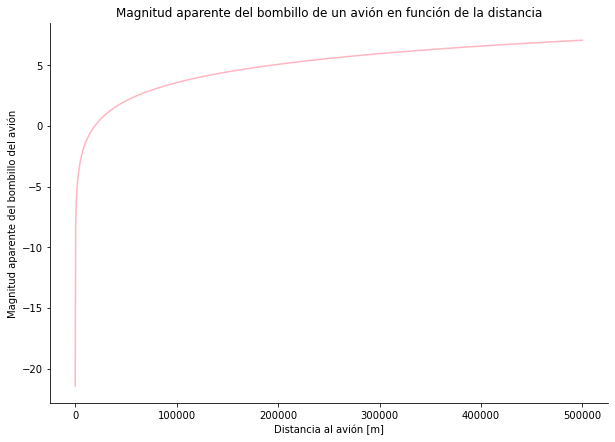

In [8]:
fig, ax= plt.subplots(figsize=(10,7))
plt.plot(d,m,c='lightpink')
plt.xlabel('Distancia al avión [m]')
plt.ylabel('Magnitud aparente del bombillo del avión')
plt.title('Magnitud aparente del bombillo de un avión en función de la distancia')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.gca().invert_yaxis() # Si lo volteo?
plt.show()

Note que, a medida que aumenta la distancia, la magnitud incrementa también. Esto significa que, a distancias más pequeñas, el bombillo es más brillante (como es de esperarse).

Note que la magnitud aumenta muy rápido para distancias pequeñas. Si miramos el gráfico solamente para los 100 primeros metros, vemos que la magnitud incremente rápidamente (al tener un comportamiento logarítmico).

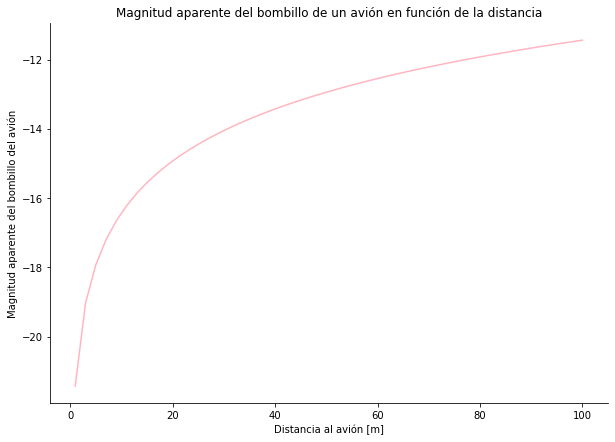

In [11]:
d_1 = np.linspace(1, 100)
m_1 = -2.5*np.log10((1/(4*np.pi*(d_1**2)))*(12000/(2.56*10**-6)) )
fig, ax= plt.subplots(figsize=(10,7))
plt.plot(d_1,m_1,c='lightpink')
plt.xlabel('Distancia al avión [m]')
plt.ylabel('Magnitud aparente del bombillo del avión')
plt.title('Magnitud aparente del bombillo de un avión en función de la distancia')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.gca().invert_yaxis() # Si lo volteo?
plt.show()

De acuerdo con Chandra, un valor interesante es la distancia para la cual la magnitud es aproximadamente 6. es decir, cuando empieza a ser visible para el ojo humano. De esta forma, tomamos el valor más cercano a 6 y calculamos la distancia para la cual empieza a ser visible el avión

In [35]:
m_6 = m[m >= 6][0] # El valor de la magnitud 6
i = np.where(m == m_6)[0] # El indice donde ocurre
d_6 = d[i][0] # La distancia a la cual el avion empieza a ser visible
print('La distancia a la que el avión empieza a ser visible es: {:.2f} km'.format((d_6/1000)))

La distancia a la que el avión empieza a ser visible es: 306.31 km


Por lo tanto, los humanos empezaríamos a ver el bombillo del avión a partir de 306 km de distancia.